# [Introduction to Data Science: A Comp-Math-Stat Approach](https://lamastex.github.io/scalable-data-science/as/2019/)
## YOIYUI001, Summer 2019 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 06. Statistics from Data: Fetching New Zealand Earthquakes & Live Play with `data/`


- Live Data-fetch of NZ EQ Data
- More on Statistics
- Sample Mean
- Sample Variance
- Order Statistics
- Frequencies
- Empirical Mass Function
- Empirical Distribution Function
- List Comprehensions
- New Zealand Earthquakes
- Live Play with `data/`
  - Swedish election data
  - Biergartens in Germany
 


# Live Data-fetching Exercise Now

Go to [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/) and download data on NZ earthquakes.

<img src = "images/GeoNetQuakeSearchDownloadCSV.png" width =800>

In my attempt above to zoom out to include both islands of New Zealand (NZ) and get one year of data using the `Last Year` button choice from this site:
 - [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/)
and hitting `Search` box gave the following URLs for downloading data. I used the `DOWNLOAD` button to get my own data in Outpur Format `CSV` as chosen earlier.

https://quakesearch.geonet.org.nz/csv?bbox=163.52051,-49.23912,182.19727,-32.36140&startdate=2017-06-01&enddate=2018-05-17T14:00:00
https://quakesearch.geonet.org.nz/csv?bbox=163.52051,-49.23912,182.19727,-32.36140&startdate=2017-5-17T13:00:00&enddate=2017-06-01

## What should you do now?

Try to `DOWNLOAD` your own `CSV` data and store it in a file named **`my_earthquakes.csv`** (NOTE: rename the file when you download so you don't replace the file `earthquakes.csv`!) inside the folder named **`data`** that is inside the same directory that this notebook is in.

In [1]:
%%sh
# print working directory
pwd

/home/raaz/all/git/scalable-data-science/_in/2019/jp


In [2]:
%%sh
#s # list contents of working directory

In [3]:
%%sh
# after download you should have the following file in directory named data
ls data

NYPowerBall.csv
co2_mm_mlo.txt
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv
final.csv.zip
final.tgz
pride_and_prejudice.txt
rainfallInChristchurch.csv


In [4]:
%%sh  
# first three lines
head -3 data/earthquakes_small.csv

publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p371534,,2018-05-18T11:13:48.826Z,2018-05-18T11:15:55.741Z,176.469659,-38.10063545,2.123583253,93.125,M,,NonLinLoc,,automatic,nz3drx,18,18,11,0.3996779802,94.08602902,1.036195008,0
2018p371524,,2018-05-18T11:08:07.588Z,2018-05-18T11:11:14.319Z,176.4213445,-38.63584892,2.570467678,35.9375,M,,NonLinLoc,,automatic,nz3drx,22,22,11,0.3208135882,89.12864378,1.012353739,0


In [5]:
%%sh 
# last three lines
tail -3 data/earthquakes_small.csv

2018p352775,,2018-05-11T12:38:54.732Z,2018-05-11T12:40:28.518Z,175.6063627,-40.81585537,1.835272336,13.671875,M,,NonLinLoc,,automatic,nz3drx,22,22,12,0.1097369199,84.14006379,0.3314536834,0
2018p352725,,2018-05-11T12:12:36.343Z,2018-05-11T12:14:42.372Z,176.0372811,-38.78743116,2.103529946,76.25,M,,NonLinLoc,,automatic,nz3drx,17,17,4,0.4257033383,244.4056741,1.445270768,0
2018p352684,,2018-05-11T11:50:06.019Z,2018-05-11T11:51:41.163Z,176.5437111,-40.07042442,1.503468463,13.671875,M,,NonLinLoc,,automatic,nz3drx,13,13,7,0.079302248,81.46123042,0.4485324555,0


In [6]:
%%sh  
# number of lines in the file; menmonic from `man wc` is wc = word-count option=-l is for lines
wc -l  data/earthquakes_small.csv

411 data/earthquakes_small.csv


In [7]:
#%%sh
#man wc

## Let's analyse the measured earth quakes in `data/earthquakes.csv`

This will ensure we are all looking at the same file!

But feel free to play with your own `data/my_earthquakes.csv` on the side.

### Exercise:
Grab origin-time, lat, lon, magnitude, depth

In [7]:
with open("data/earthquakes_small.csv") as f:
    reader = f.read()
    
dataList = reader.split('\n')

In [8]:
len(dataList)

412

In [9]:
dataList[0]

'publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty'

In [10]:
myDataAccumulatorList =[]
for data in dataList[1:-2]:
    dataRow = data.split(',')
    myData = [dataRow[4],dataRow[5],dataRow[6]]#,dataRow[7]]
    myFloatData = tuple([float(x) for x in myData])
    myDataAccumulatorList.append(myFloatData)

In [11]:
points(myDataAccumulatorList)

Graphics3d Object

# More on Statistics

Recall that a statistic is any measureable function of the data: $T(x): \mathbb{X} \rightarrow \mathbb{T}$.

Thus, a statistic $T$ is also an RV that takes values in the space $\mathbb{T}$.

When $x \in \mathbb{X}$ is the observed data, $T(x)=t$ is the observed statistic of the observed data $x$.


# Let's Play Live with other datasets, shall we?

# Swedish 2018 National Election Data



## Swedish Election Outcomes 2018

See: [http://www.lamastex.org/datasets/public/elections/2018/sv/README](http://www.lamastex.org/datasets/public/elections/2018/sv/README)!

This was obtained by processing using the scripts at:

- https://gitlab.com/tilo.wiklund/swedis-election-data-scraping

You already have this dataset in your `/data` directory.

In [14]:
%%sh
cd data
# if you don't see final.csv in data/ below
# then either uncomment and try the next line in linux/Mac OSX
#tar -zxvf final.tgz
# or try the next line after uncommenting it to extract final.csv
# unzip final.csv.zip
ls -al

total 9580
drwxr-xr-x 2 sage sage    4096 Apr 22 05:39 .
drwxr-xr-x 6 sage sage    4096 Apr 22 05:52 ..
-rw-r--r-- 1 sage sage   29002 Apr 22 05:39 NYPowerBall.csv
-rw-r--r-- 1 sage sage   50555 Apr 14 12:50 co2_mm_mlo.txt
-rw-r--r-- 1 sage sage 1344114 Apr 14 12:50 earthquakes.csv.zip
-rw-r--r-- 1 sage sage 1344959 Apr 14 12:50 earthquakes.tgz
-rw-r--r-- 1 sage sage   77786 Apr 14 12:50 earthquakes_small.csv
-rw-r--r-- 1 sage sage 4894689 Nov  9 11:50 final.csv
-rw-r--r-- 1 sage sage  467572 Apr 14 12:50 final.csv.zip
-rw-r--r-- 1 sage sage  467611 Apr 14 12:50 final.tgz
-rw-r--r-- 1 sage sage  724725 Apr 14 12:50 pride_and_prejudice.txt
-rw-r--r-- 1 sage sage  376954 Apr 14 12:50 rainfallInChristchurch.csv


In [15]:
%%sh
wc data/final.csv
head data/final.csv

  82226  461865 4894689 data/final.csv
region,municipality,district,party,votes
Blekinge län,Karlshamn,0 - Centrala Asarum,S,519
Blekinge län,Karlshamn,0 - Centrala Asarum,SD,311
Blekinge län,Karlshamn,0 - Centrala Asarum,M,162
Blekinge län,Karlshamn,0 - Centrala Asarum,V,82
Blekinge län,Karlshamn,0 - Centrala Asarum,KD,53
Blekinge län,Karlshamn,0 - Centrala Asarum,C,37
Blekinge län,Karlshamn,0 - Centrala Asarum,L,37
Blekinge län,Karlshamn,0 - Centrala Asarum,MP,32
Blekinge län,Karlshamn,0 - Centrala Asarum,BLANK,13


## Counting total votes per party
Let's quickly load the data using [`csv.reader`](https://docs.python.org/2/library/csv.html) and count the number of votes for each party over all of Sweden next.

In [16]:
import csv, sys

filename = 'data/final.csv'
linesAlreadyRead=0
partyVotesDict={}
with open(filename, 'rb') as f:
    reader = csv.reader(f,delimiter=',',quotechar='"')
    headers = next(reader) # skip first line of header
    try:
        for row in reader:
            linesAlreadyRead+=1
            party=row[3].decode('utf-8') # convert str to unicode
            votes=int(row[4])
            if party in partyVotesDict: # the data value already exists as a key
                partyVotesDict[party] = partyVotesDict[party] + votes # add 1 to the count
            else: # the data value does not exist as a key value
                # add a new key-value pair for this new data value, frequency 1
                partyVotesDict[party] = votes
    except csv.Error as e:
        sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))

print "lines read = ", linesAlreadyRead

lines read =  82225


In [17]:
# fancy printing of non-ASCII string
for kv in partyVotesDict.items():
    print "party ",kv[0], "\thas a total of votes =\t", kv[1]

party  C 	has a total of votes =	557500
party  KD 	has a total of votes =	409478
party  OG 	has a total of votes =	3342
party  BLANK 	has a total of votes =	53084
party  M 	has a total of votes =	1284698
party  L 	has a total of votes =	355546
party  ÖVR 	has a total of votes =	69472
party  S 	has a total of votes =	1830386
party  MP 	has a total of votes =	285899
party  V 	has a total of votes =	518454
party  FI 	has a total of votes =	29665
party  OGEJ 	has a total of votes =	2120
party  SD 	has a total of votes =	1135627


In [18]:
# let's sort by descending order of votes
for party in sorted(partyVotesDict, key=partyVotesDict.get, reverse=True):
  print party, "\t", partyVotesDict[party]

S 	1830386
M 	1284698
SD 	1135627
C 	557500
V 	518454
KD 	409478
L 	355546
MP 	285899
ÖVR 	69472
BLANK 	53084
FI 	29665
OG 	3342
OGEJ 	2120


In [19]:
# To get a dictionary back with the top K=3 most popular parties
top3PartiesDict={} # make an empty dict
for party in sorted(partyVotesDict, key=partyVotesDict.get, reverse=True):
    top3PartiesDict[party]=partyVotesDict[party]
top3PartiesDict

{u'BLANK': 53084,
 u'C': 557500,
 u'FI': 29665,
 u'KD': 409478,
 u'L': 355546,
 u'M': 1284698,
 u'MP': 285899,
 u'OG': 3342,
 u'OGEJ': 2120,
 u'S': 1830386,
 u'SD': 1135627,
 u'V': 518454,
 u'\xd6VR': 69472}

---
## Assignment 2, PROBLEM 1
Maximum Points = 1


Recall how we downloaded *Pride and Prejudice* and processed it as a String and split it by `Chapter`s. These code snippets are at our disposal now - all we need to do is copy-paste the right set of cells from earlier into the cells below here to have the string from that Book for more refined processing.

Think about what algorithmic constructs and methods one will need to `split` each sentence by the **English words** it contains and then count the number of each distinct word.

Now that you have understood `for` loops, `list` comprehensions and anonymous `function`s, and can learn about the needed methods on strings for splitting (which you can search by adding a `.` after a `srt` and hitting the `Tab` button to look through existing methods and followed by `?` for their docstrings), the `dictionary` data structure, and already seen how to count the number of ball labels, you are ready for this problem stated below. If you attended the lab then you have an advantage if you tried to work on this with some help from your instructors.

**Problem:** Process the English words in a text file, such as those in the book *Pride and Prejudice* by Jane Austin, and obtain the top `K` most frequent *words that are longer than* a given parameter `wordLongerThan` which can be any value in $\mathbb{Z}_+ := \{ 0, 1, 2, 3, 4, \ldots \}$, i.e., *words that are longer than* `wordLongerThan` many characters in length. 

Your function must be generic and named as follows including input parameter order and names: 

- `frequencyOftheKMostCommonWordsIn(thisTextFile, wordLongerThan, K)`

This function must be capable of:
- reading any available text file in the `data/` directory that can be passed as the parameter `thisTextFile` 
- and return a `dict` type whose:
  - key is the word whose character length is longer than the parameter `wordlongerThan` and 
  - value is the frequency of this word in the text file. 
  - Yor returned `dict` should only contain the top `K` most frequent words longer than `wordLongerThan` and be already sorted in descending order of in frequency.

Use the next cell to submit your answer and for rough-work use more cells as needed in order to copy-paste code snippets from earlier content to get this working. But please remove the cells for rough-work when done.

*Note: that you may not import libraries that have not been introduced in the course so far.*

In [19]:

# Report these variables so the exam can be calibrated fairly - your report will be used to justify exam-difficulty
timeToCompleteThisProblemInMinutes = 0 # replace 0 by a positive integer if it applies

# Do NOT change the name of the function and names of paramaters !

thisTextFile = 'data/someTextFilename' # try a text file in data/ directory
wordLongerThan = 0 # this can be any larger integer also
K = 20 # this can be any integer larger than 0 also

def frequencyOftheKMostCommonWordsIn(thisTextFile, wordLongerThan, K):
    '''explain what the function is supposed to do briefly'''
    # write the body of the function and replace 'None' with the correct return value
    # ...
    # ...
    return None

# Geospatial adventures

Say you want to visit some places of interest in Germany. This tutorial on [Open Street Map's Overpass API](https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/) shows you how to get the locations of `"amenity"="biergarten"` in Germany.

We may come back to [https://www.openstreetmap.org](https://www.openstreetmap.org) later. If we don't then you know where to go for openly available data for geospatial statistical analysis.

In [12]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [21]:
#data # uncomment this cell to see the raw JSON

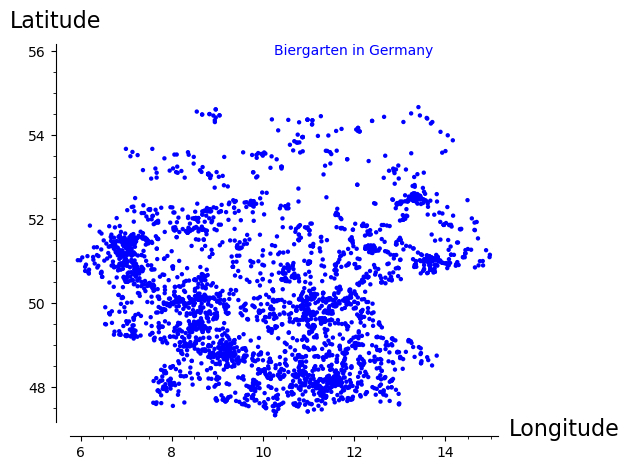

In [13]:
import numpy as np

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

p = points(zip(X[:, 0], X[:, 1]))
p += text('Biergarten in Germany',(12,56))
p.axes_labels(['Longitude','Latitude'])
#plt.axis('equal')
p.show()

## Pubs in Sweden
With a minor modification to the above code we can view `amenity=pub` in Sweden.

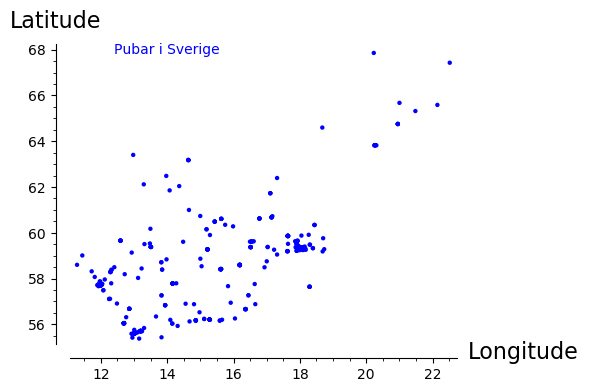

In [24]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="SE"][admin_level=2];
(node["amenity"="pub"](area);
 way["amenity"="pub"](area);
 rel["amenity"="pub"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

import numpy as np

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

p = points(zip(X[:, 0], X[:, 1]))
p += text('Pubar i Sverige',(14,68))
p.axes_labels(['Longitude','Latitude'])
#plt.axis('equal')
p.show()

---
## Assignment 2, PROBLEM 2
Maximum Points = 1


Recall the problem above on counting the number of votes by party across all of Sweden from the **Swedish 2018 National Election Data**.

Your task is to adapt the code snippets there and others we have encountered thus far to count the total number of votes by each **district** and return a `list` of `Integers` giving the number of votes for the top `K` districts with the most votes. Your function `numberOfVotesInKMostVotedDistrictsInSE('data/final.csv', K)` should work for any valid integer `K`. 

*Note: that you may not import libraries that have not been introduced in the course so far.*

---
*unzip issues:* If you are unable to call `unzip final.csv.zip` on your windows laptop. You can either do it in the computer lab or do the following with internet access to download the large `final.csv` file from the internet:

```
%%sh
cd data
 
curl -O http://lamastex.org/datasets/public/elections/2018/sv/final.csv
```

Then you should have the needed `data/final.csv` file.

---

In [25]:

# Report these variables so the exam can be calibrated fairly - your report will be used to justify exam-difficulty
timeToCompleteThisProblemInMinutes = 0 # replace 0 by a positive integer if it applies

# Do NOT change the name of the function and names of paramaters !

K = 20 # this can be any integer larger than 0 also, change K and make sure your function works
filename = 'data/final.csv' # this has to be a csv file with the same structure as out final.csv

def numberOfVotesInKMostVotedDistrictsInSE(filename, K):
    '''explain what the function is supposed to do briefly'''
    # write the body of the function and replace 'None' with the correct return value
    # ...
    # ...
    return None

---
#### Local Test for Assignment 2, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                         You **should not** modify anything in the cell below when evaluating it to do a local test of                         your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [27]:
# test that your answer is indeed a probability by evaluating this cell after you replaced XXX above and evaluated it.
try:
    assert(numberOfVotesInKMostVotedDistrictsInSE('data/final.csv', 3) == [13435, 10625, 7910])
    assert(numberOfVotesInKMostVotedDistrictsInSE('data/final.csv', 1) == [13435])
    print("Your answer is correct for two test cases with K=3 and K=1. Hopefully it works correctly for any K")
except AssertionError:
    print("Try again! and make sure you are actually producing what is expected of you.")

Your answer is correct for two test cases with K=3 and K=1. Hopefully it works correctly for any K
